# Capstone 2: Narrative Analytics and Experimentation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Visualization and Analysis

In [3]:
# Load data (from https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store
PATH = '/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv' 
ecom_data = pd.read_csv(PATH)

# Drop rows with na and select data for sport products only
ecom_data.dropna(axis='index', inplace=True)
ecom_sport = ecom_data[ecom_data['category_code'].str.contains('sport')]

# Check data
ecom_sport.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
661,2019-10-01 00:10:47 UTC,view,27000002,2053013564674802599,sport.trainer,housefit,460.76,523185540,19016b1d-72b4-43af-9cd2-216061797861
1249,2019-10-01 02:17:09 UTC,view,12200907,2116907525176557699,sport.bicycle,torrent,64.32,524161224,da14d61c-207e-4049-9391-d8fdd5c96c5a
1933,2019-10-01 02:20:38 UTC,view,12200122,2116907525176557699,sport.bicycle,mars,83.40,516365289,4c6eb209-227a-41e0-8648-1ed9bcda608d
1939,2019-10-01 02:20:40 UTC,view,12202050,2116907525176557699,sport.bicycle,sunday,308.63,514684063,fc9a5887-391c-403d-87c1-128d4dde1fb9
2061,2019-10-01 02:21:00 UTC,view,12202054,2116907525176557699,sport.bicycle,sunday,267.70,514684063,fc9a5887-391c-403d-87c1-128d4dde1fb9


In [4]:
# Drop all rows where event_type equals purchase
# Some items in the dataset were purchased without
# first being viewed and added to the cart, making
# the purchase data difficult to interpret
ecom_sport = ecom_sport[ecom_sport['event_type'].str.contains('purchase') == False]

# Write data to new csv file
ecom_sport.to_csv('ecom_sport', index=False)

In [5]:
ecom_sport.describe()

,product_id,category_id,price,user_id
count,1.519860e+05,1.519860e+05,151986.000000,1.519860e+05
mean,1.663246e+07,2.106827e+18,405.540150,5.339767e+08
std,9.784682e+06,2.500076e+16,478.980633,1.855447e+07
min,1.220001e+07,2.053014e+18,3.860000,2.097140e+08
25%,1.220156e+07,2.116908e+18,141.550000,5.160284e+08
50%,1.220217e+07,2.116908e+18,220.200000,5.313013e+08
75%,1.220266e+07,2.116908e+18,460.760000,5.520512e+08
max,5.280002e+07,2.138568e+18,2573.810000,5.662418e+08


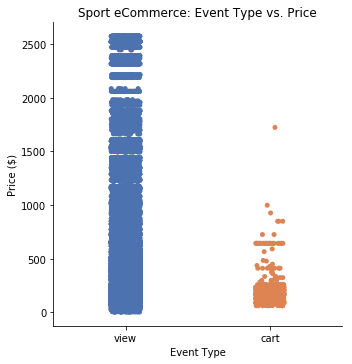

In [6]:
# Use catplot to look at relationship between event_type and price
sns.catplot(x='event_type',
            y='price',
            palette='deep',
            data=ecom_sport)

plt.xlabel('Event Type')
plt.ylabel('Price ($)')
plt.title('Sport eCommerce: Event Type vs. Price')
plt.show()

* Although customers view many items, they add relatively few to their carts
* Customers add cheaper items to their carts more often than expensive items

In [7]:
# Number of 'view'
view = (ecom_sport['event_type'] == 'view').value_counts(sort=False).tolist()[1]

# Number of 'cart'
cart = (ecom_sport['event_type'] == 'cart').value_counts(sort=False).tolist()[1]

print('View: {}\tCart: {}'.format(view, cart))

View: 151166	Cart: 820


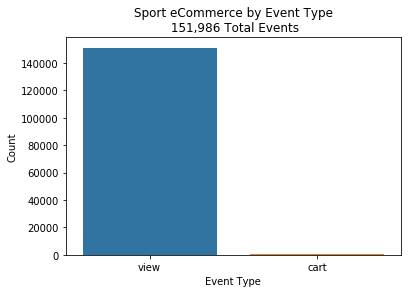

In [13]:
# Count plot for total events
sns.countplot(x="event_type", data=ecom_sport)

plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Sport eCommerce by Event Type\n 151,986 Total Events')
plt.show()

* Of the 151,986 total sport ecommerce events, only 820 (0.5%) were so-called cart events. Again, this suggests that customers are viewing items on the ecommerce site, but are not adding them to their shopping carts.

In [9]:
# Get list of unique product ids
products = ecom_sport['product_id'].unique()

# Find cart rate for each product and add to sport_cart data frame
for product in products:
    test = ecom_sport[ecom_sport['product_id'] == product]
    view = test.loc[test['event_type'] == 'view', 'event_type'].count() 
    cart = test.loc[test['event_type'] == 'cart', 'event_type'].count()
    cart_rate = cart / view
    ecom_sport.loc[ecom_sport.index[ecom_sport['product_id'] == product], 'cart_rate'] = cart_rate

In [10]:
# Check data
ecom_sport.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,cart_rate
661,2019-10-01 00:10:47 UTC,view,27000002,2053013564674802599,sport.trainer,housefit,460.76,523185540,19016b1d-72b4-43af-9cd2-216061797861,0.000000
1249,2019-10-01 02:17:09 UTC,view,12200907,2116907525176557699,sport.bicycle,torrent,64.32,524161224,da14d61c-207e-4049-9391-d8fdd5c96c5a,0.011027
1933,2019-10-01 02:20:38 UTC,view,12200122,2116907525176557699,sport.bicycle,mars,83.40,516365289,4c6eb209-227a-41e0-8648-1ed9bcda608d,0.000000
1939,2019-10-01 02:20:40 UTC,view,12202050,2116907525176557699,sport.bicycle,sunday,308.63,514684063,fc9a5887-391c-403d-87c1-128d4dde1fb9,0.000000
2061,2019-10-01 02:21:00 UTC,view,12202054,2116907525176557699,sport.bicycle,sunday,267.70,514684063,fc9a5887-391c-403d-87c1-128d4dde1fb9,0.000000


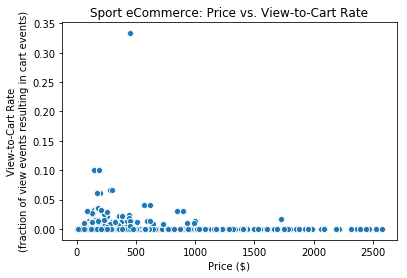

In [34]:
# Plot cart rate vs price
sns.scatterplot(x='price',
                y='cart_rate',
                data=ecom_sport)

plt.xlabel('Price ($)')
plt.ylabel('View-to-Cart Rate\n(fraction of view events resulting in cart events)')
plt.title('Sport eCommerce: Price vs. View-to-Cart Rate')
plt.show()

In [37]:
ave = round(ecom_sport['cart_rate'].mean() * 100, 2)
print('The average view-to-cart rate for all viewed products is {}%'.format(ave))

The average view-to-cart rate for all viewed products is 0.56%


* For any given product in the sport ecommerce dataset, the view-to-cart rate (or the percent of viewing events that result in a cart event) is below 35%, with the majority having a rate at or below 5%. The average view-to-cart rate is only 0.56%.
* Additionally, products with prices greater than $1000 have view-to-cart rates of nearly 0%.
* Overall, these three visualizations suggest that getting customers to add products to their carts, rather than just viewing the products, may increase overall sales.


## Rationale

Although many factors may explain the low view-to-cart rate, including the Add to Cart button itself, poor or non-existent product images, lack of product info, inability to find product of interest, unclear shipping info, unfamiliarity with the site, and uncompetitive prices, for the purposes of this experiment I will focus on the effect of free shipping on the view-to-cart rate. In reality, ecommerce businesses would likely add an exit survey to their site to better understand why customers are leaving the site without adding products to their cart (and ultimately purchasing the viewed products).

## Hypothesis

Ecommerce businesses can increase the view-to-cart rate by clearly displaying a free shipping banner at the top of their webpage.

## Rollout Plan

The plan is to show the original webpage (without the free shipping banner) or the new webpage (with the free shipping banner) to users at random (50/50 split) over a period of two weeks. We expect about 5,000 visitors per day, meaning we should finish with about 35,000 users per group.

During the two weeks of testing, we will collect product IDs, number of view events, number of cart events, and number of purchase events for both webpages, separately. As our primary success metric, we will use the product IDs, view events, and cart events to calculate the view-to-cart rate for each product and compare these rates across the two webpages. As a secondary metric, we will also use the product IDs, cart events, and purchase events to calculate the cart-to-purchase rate for each product and compare these rates across the two webpages.

## Evaluation Plan

We will use a two sample proportional z-test with a p-value cutoff of 0.05 to determine whether the view-to-cart rates are higher, on average, for the new webpage than for the original webpage. A statistically significant (p < 0.05) increase of at least 15% in view-to-cart rates for the new webpage, as compared to the original webpage, will constitute success. If the view-to-cart rates for the new webpage are not at least 15% higher than those for the original webpage, we can conclude that the free shipping banner as implemented in this experiment did not increase the view-to-cart rate and should instead test one of the other variables listed above.

In addition, we will use the same statistical analysis to compare the cart-to-purchase rates between the two webpages. Although the results of this experiment will not directly determine success, a statistically significant increase in the cart-to-purchase rate for the new webpage, as compared to the original webpage, would suggest that a free shipping banner may have a positive effect on preventing cart abandonment. Additional tests would then be necessary to follow-up on this finding.

